In [102]:
 %matplotlib inline

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [104]:
df=pd.read_csv('../csv-data/cctv_seoul.csv')
df.columns[0]

df.rename(columns={df.columns[0]:'구별'}, inplace=True)
df.head()


,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [105]:
pop_seoul=pd.read_excel('../csv-data/pop_seoul.xls', header=2, usecols='B,D,G,J,N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [106]:

pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',pop_seoul.columns[1]:'인구수',pop_seoul.columns[2]:'한국인',pop_seoul.columns[3]:'외국인',pop_seoul.columns[4]:'고령자'}, inplace=True)
# pop_seoul.columns=['구별','인구수','한국인','외국인','고령자']

pop_seoul.drop([0], axis=0, inplace=True)

In [107]:

pop_seoul['외국인 비율']=pop_seoul['외국인']/pop_seoul['인구수']*100
pop_seoul['고령자 비율']=pop_seoul['고령자']/pop_seoul['인구수']*100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [108]:

df['최근 증가율'] = (df['2014년']+df['2015년']+df['2016년'])/df['2013년도 이전'] *100
df.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [109]:
data_result=pd.merge(df, pop_seoul, on='구별')

In [110]:
data_result.drop(['2013년도 이전', '2014년','2015년','2016년'], axis=1, inplace=True)

In [111]:
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [112]:
df=pd.read_csv('../csv-data/crime_seoul_2.csv')

df.rename(columns={df.columns[0]:'구별'}, inplace=True)

In [113]:
df['절도 발생']=df['절도 발생'].str.replace(',','')
df['절도 검거']=df['절도 검거'].str.replace(',','')
df['폭력 발생']=df['폭력 발생'].str.replace(',','')
df['폭력 검거']=df['폭력 검거'].str.replace(',','')

df['절도 발생'] = pd.to_numeric(df['절도 발생'])
df['절도 검거'] = pd.to_numeric(df['절도 검거'])
df['폭력 발생'] = pd.to_numeric(df['폭력 발생'])
df['폭력 검거'] = pd.to_numeric(df['폭력 검거'])
df.head()

,구별,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,Unnamed: 11
0,중구,2,2,3,2,105,65,1395,477,1355,1170,NaN
1,종로구,3,3,6,5,115,98,1070,413,1278,1070,NaN
2,중구,1,0,6,4,65,46,1153,382,869,794,NaN
3,서대문구,2,2,5,4,154,124,1812,738,2056,1711,NaN
4,종로구,3,2,5,4,96,63,1114,424,1015,861,NaN


In [114]:
df.drop(columns=['Unnamed: 11'], inplace=True)

In [115]:
df.drop(columns=['Unnamed: 11'], inplace=True)
df['살인 검거율'] = df['살인 검거']/df['살인 발생'] *100
df['강도 검거율'] = df['강도 검거']/df['강도 발생']*100
df['강간 검거율'] = df['강간 검거']/df['강간 발생']*100
df['절도 검거율'] = df['절도 검거']/df['절도 발생']*100
df['폭력 검거율'] = df['절도 검거']/ df['절도 발생']*100

In [116]:
df['총 범죄 수'] = df['살인 발생']+df['강도 발생']+df['강간 발생']+df['절도 발생']+df['절도 발생']

In [117]:
df.drop(columns=['강도 검거', '절도 검거', '폭력 검거', '강간 검거','살인 검거' ], inplace=True)

In [118]:
r_df=df.groupby('구별').sum()
r_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 11 columns):
살인 발생     25 non-null int64
강도 발생     25 non-null int64
강간 발생     25 non-null int64
절도 발생     25 non-null int64
폭력 발생     25 non-null int64
살인 검거율    25 non-null float64
강도 검거율    25 non-null float64
강간 검거율    25 non-null float64
절도 검거율    25 non-null float64
폭력 검거율    25 non-null float64
총 범죄 수    25 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.3+ KB


In [119]:
data_result_crime=pd.merge(r_df, data_result, on='구별')
data_result_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 20 columns):
구별        25 non-null object
살인 발생     25 non-null int64
강도 발생     25 non-null int64
강간 발생     25 non-null int64
절도 발생     25 non-null int64
폭력 발생     25 non-null int64
살인 검거율    25 non-null float64
강도 검거율    25 non-null float64
강간 검거율    25 non-null float64
절도 검거율    25 non-null float64
폭력 검거율    25 non-null float64
총 범죄 수    25 non-null int64
소계        25 non-null int64
최근 증가율    25 non-null float64
인구수       25 non-null float64
한국인       25 non-null float64
외국인       25 non-null float64
고령자       25 non-null float64
외국인 비율    25 non-null float64
고령자 비율    25 non-null float64
dtypes: float64(12), int64(7), object(1)
memory usage: 4.1+ KB


In [120]:
data_result_crime.set_index('구별', inplace=True)

In [121]:
data_result_crime['범죄 발생율 합계']= data_result_crime['총 범죄 수'] / data_result_crime['총 범죄 수'].sum()
data_result_crime['범죄 발생율 합계']

구별
강남구     0.070239
강동구     0.042042
강북구     0.026111
강서구     0.038403
관악구     0.049381
광진구     0.054162
구로구     0.042695
금천구     0.028274
노원구     0.039484
도봉구     0.019227
동대문구    0.035647
동작구     0.034583
마포구     0.046574
서대문구    0.032489
서초구     0.048755
성동구     0.028781
성북구     0.032017
송파구     0.057699
양천구     0.033553
영등포구    0.053724
용산구     0.028557
은평구     0.034386
종로구     0.039450
중구      0.045304
중랑구     0.038463
Name: 범죄 발생율 합계, dtype: float64

In [122]:
data_result_crime

,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생,살인 검거율,강도 검거율,강간 검거율,절도 검거율,폭력 검거율,총 범죄 수,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,범죄 발생율 합계
구별,,,,,,,,,,,,,,,,,,,,
강남구,13,21,449,3850,4284,170.000000,180.000000,158.221477,87.095081,87.095081,8183,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.070239
강동구,4,6,156,2366,2712,75.000000,133.333333,78.846154,33.347422,33.347422,4898,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.042042
강북구,7,14,153,1434,2649,114.285714,92.857143,82.352941,43.096234,43.096234,3042,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.026111
강서구,7,13,262,2096,3207,114.285714,100.000000,72.900763,60.114504,60.114504,4474,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.038403
관악구,9,12,320,2706,3298,88.888889,116.666667,69.062500,30.561715,30.561715,5753,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.049381
광진구,4,14,240,3026,2625,100.000000,185.714286,91.666667,42.200925,42.200925,6310,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.054162
구로구,8,15,281,2335,3007,75.000000,73.333333,58.362989,38.072805,38.072805,4974,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.042695
금천구,3,6,151,1567,2054,133.333333,100.000000,80.794702,56.668794,56.668794,3294,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.028274
노원구,10,7,197,2193,2723,100.000000,100.000000,61.421320,36.525308,36.525308,4600,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.039484


In [125]:
c_crime= data_result_crime.corr()
c_crime

,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생,살인 검거율,강도 검거율,강간 검거율,절도 검거율,폭력 검거율,총 범죄 수,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,범죄 발생율 합계
살인 발생,1.000000,0.674517,0.630405,0.623768,0.768140,-0.100795,-0.000321,-0.152480,-0.068249,-0.068249,0.636505,0.122381,0.198283,0.483755,0.465283,0.204198,0.418230,-0.046058,-0.333755,0.636505
강도 발생,0.674517,1.000000,0.617927,0.574428,0.690986,-0.209883,0.117409,-0.097573,-0.040038,-0.040038,0.589197,0.133288,0.157626,0.150353,0.121142,0.436103,0.094879,0.272077,-0.139448,0.589197
강간 발생,0.630405,0.617927,1.000000,0.746281,0.670667,0.211761,0.309910,0.088874,0.222939,0.222939,0.775341,0.445849,0.108363,0.376354,0.357080,0.236708,0.238595,0.036447,-0.461394,0.775341
절도 발생,0.623768,0.574428,0.746281,1.000000,0.804446,0.027371,0.391653,0.120267,0.141937,0.141937,0.998989,0.251644,0.065735,0.421771,0.405541,0.180018,0.199946,0.038338,-0.593427,0.998989
폭력 발생,0.768140,0.690986,0.670667,0.804446,1.000000,-0.043307,0.144007,-0.038326,0.062027,0.062027,0.809663,0.315132,0.090606,0.611615,0.591772,0.202409,0.505161,-0.068483,-0.471083,0.809663
살인 검거율,-0.100795,-0.209883,0.211761,0.027371,-0.043307,1.000000,0.462460,0.801382,0.776737,0.776737,0.038694,0.599579,-0.193026,0.078876,0.099748,-0.345914,0.063198,-0.279585,-0.076323,0.038694
강도 검거율,-0.000321,0.117409,0.309910,0.391653,0.144007,0.462460,1.000000,0.692331,0.685373,0.685373,0.391396,0.245631,0.131659,-0.103085,-0.091526,-0.164539,-0.166369,-0.026356,-0.039485,0.391396
강간 검거율,-0.152480,-0.097573,0.088874,0.120267,-0.038326,0.801382,0.692331,1.000000,0.888151,0.888151,0.118932,0.432935,0.001646,-0.133024,-0.107689,-0.377746,-0.122958,-0.176069,0.155644,0.118932
절도 검거율,-0.068249,-0.040038,0.222939,0.141937,0.062027,0.776737,0.685373,0.888151,1.000000,1.000000,0.148566,0.446364,0.034418,-0.078258,-0.060323,-0.270341,-0.076896,-0.074080,0.125278,0.148566
폭력 검거율,-0.068249,-0.040038,0.222939,0.141937,0.062027,0.776737,0.685373,0.888151,1.000000,1.000000,0.148566,0.446364,0.034418,-0.078258,-0.060323,-0.270341,-0.076896,-0.074080,0.125278,0.148566


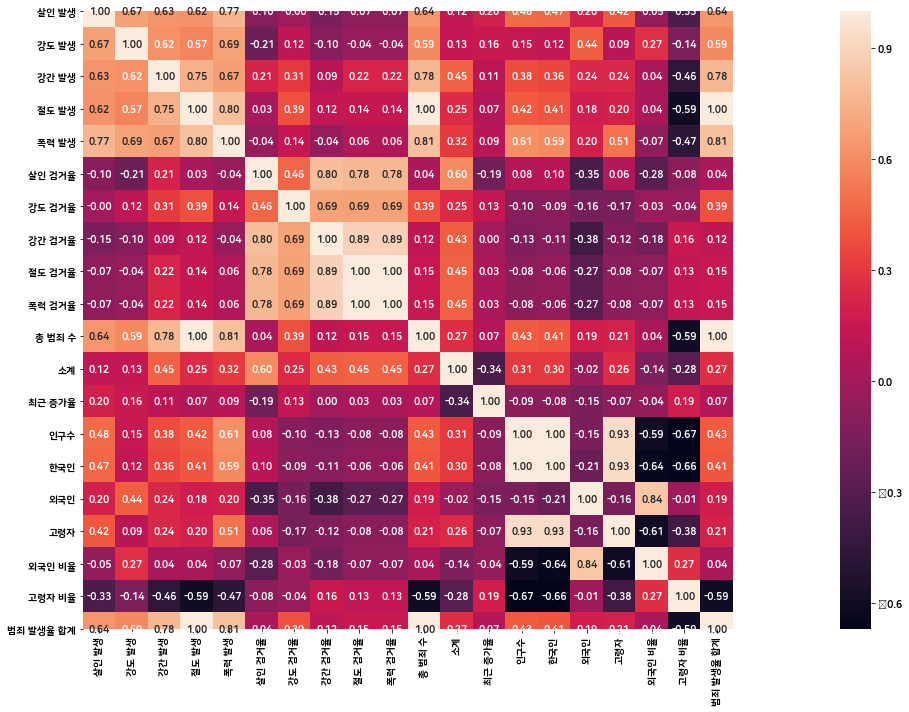

In [126]:
plt.rcParams["figure.figsize"] = (30,10)
crime = sns.heatmap(c_crime.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 10},
            yticklabels=c_crime.columns,
            xticklabels=c_crime.columns)

plt.tight_layout()
plt.show()

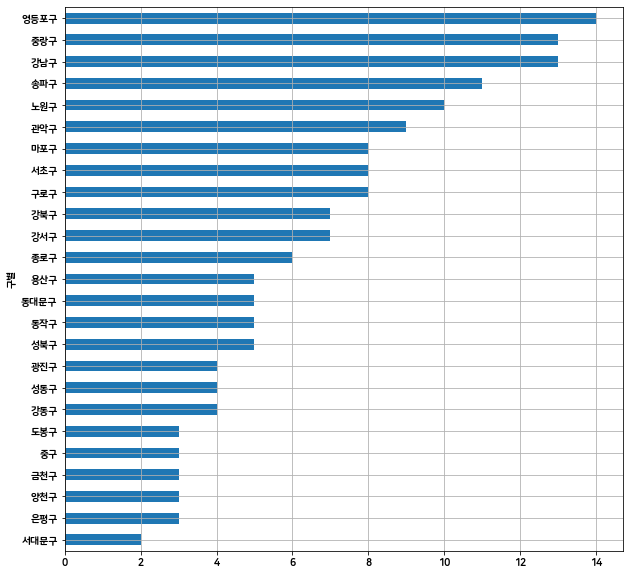

In [127]:
#강간 강도 폭력 살인 절도 많이 일어나는 구 
data_result_crime['살인 발생'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

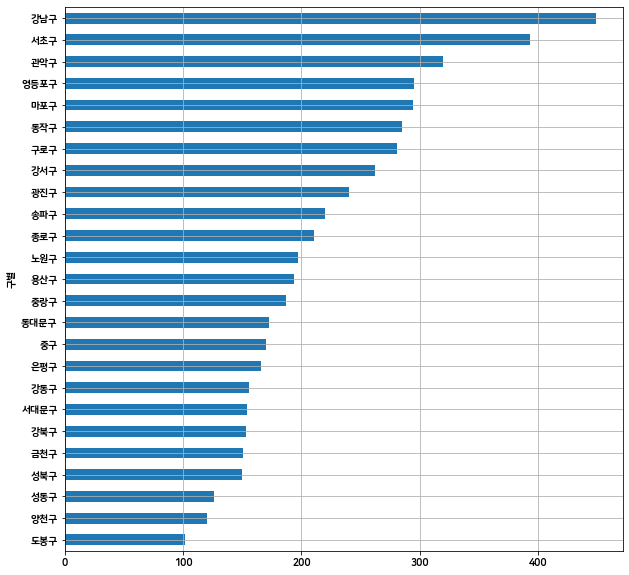

In [128]:
data_result_crime['강간 발생'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

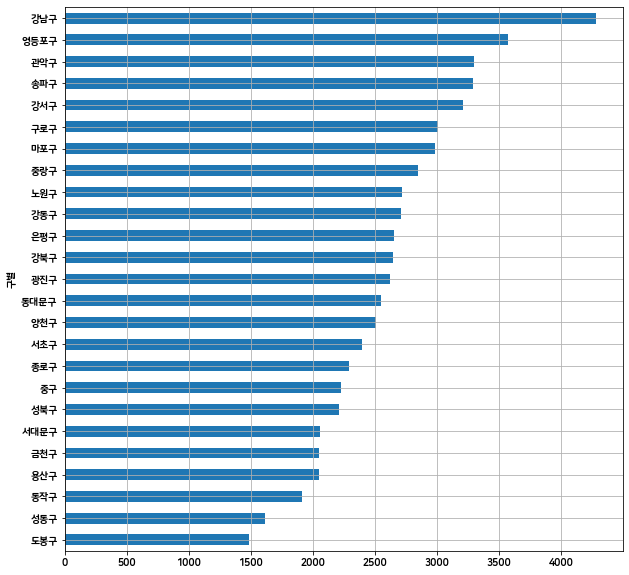

In [129]:
data_result_crime['폭력 발생'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

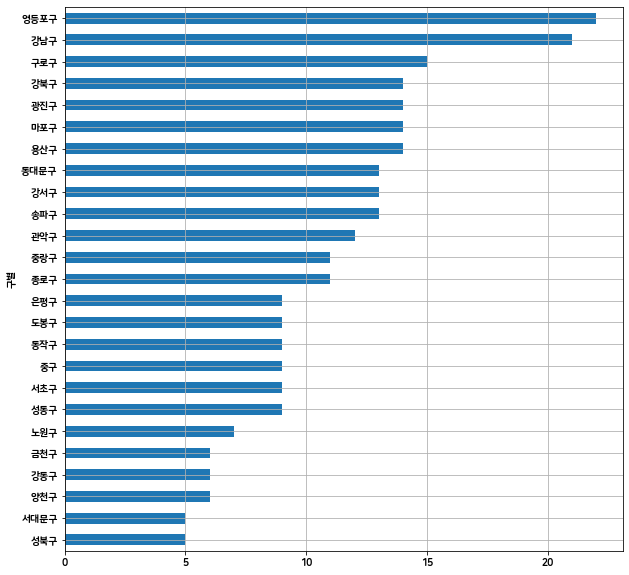

In [130]:
data_result_crime['강도 발생'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

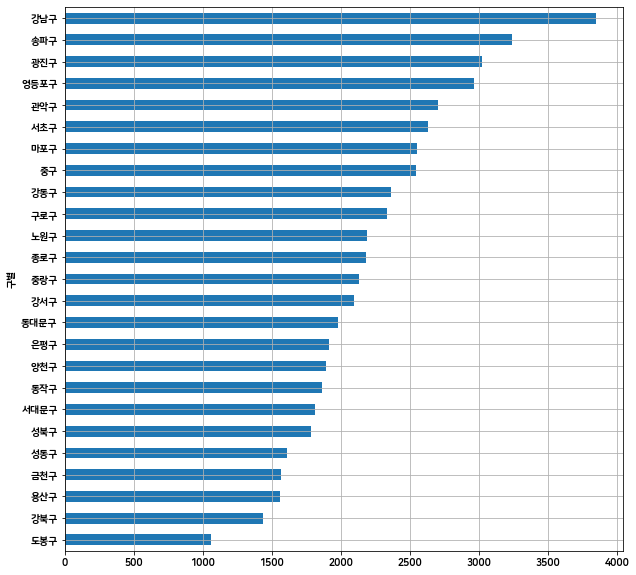

In [131]:
data_result_crime['절도 발생'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

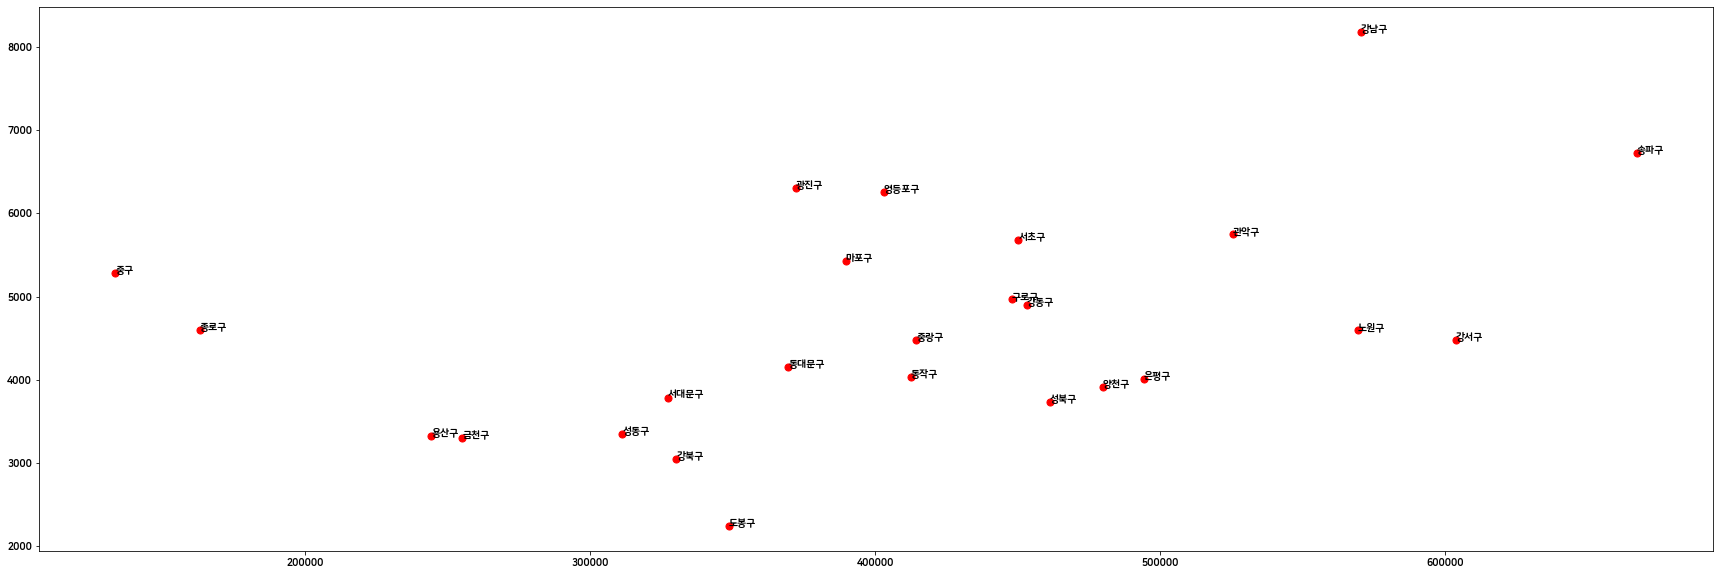

In [132]:
#인구수와 범죄발생율은 관련이 있을까?
plt.scatter(data_result_crime['인구수'], data_result_crime['총 범죄 수'], s=50 , c='r') #'r',  c='#33FFCE'
for i in range(25):
    plt.text(data_result_crime['인구수'][i], data_result_crime['총 범죄 수'][i], data_result_crime.index[i])

In [133]:
f1=np.polyfit(data_result_crime['인구수'],data_result_crime['총 범죄 수'],1)
p1 = np.poly1d(f1)
fx=np.linspace(100000,700000,100)

([<matplotlib.patches.Wedge at 0x1f24a12da08>,
 [Text(1.073327864199383, 0.24076398387879963, '강남구'),
  Text(0.9240645466058544, 0.5967450994403868, '강동구'),
  Text(0.7761692327305293, 0.779462200598914, '강북구'),
  Text(0.6033828203099159, 0.9197440797063344, '강서구'),
  Text(0.33013748274139276, 1.0492898753391156, '관악구'),
  Text(-0.02251229151688376, 1.0997696107506603, '광진구'),
  Text(-0.35098057577018366, 1.0425030625528304, '구로구'),
  Text(-0.5728034953424015, 0.9390932625269588, '금천구'),
  Text(-0.7582726558199147, 0.796883039997598, '노원구'),
  Text(-0.8915616654435891, 0.6442963578287975, '도봉구'),
  Text(-0.9888692608737432, 0.48180658453264946, '동대문구'),
  Text(-1.070340981419003, 0.2537127972629795, '동작구'),
  Text(-1.0997284624268282, -0.024439904425443602, '마포구'),
  Text(-1.0599706562053983, -0.29404456802242973, '서대문구'),
  Text(-0.951394595225832, -0.5521307129431178, '서초구'),
  Text(-0.7901451629227452, -0.7652912004654102, '성동구'),
  Text(-0.6304926423091226, -0.9013761856151188, '성북구

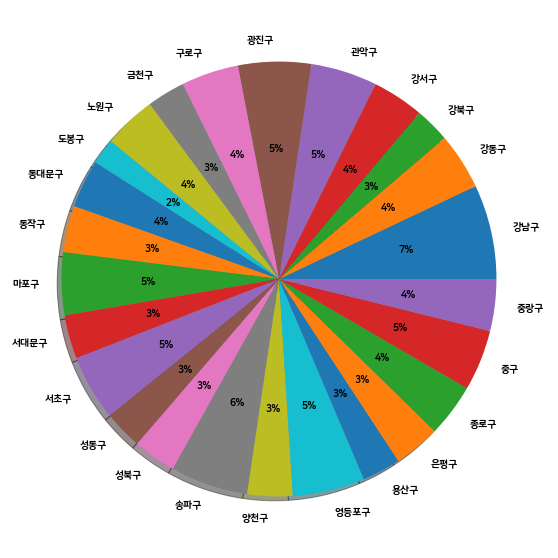

In [134]:
#어느 지역에서 범죄가 가장 많이 발생할까.... >7% 강남구

x=data_result_crime['범죄 발생율 합계'].index.tolist()
y=data_result_crime['범죄 발생율 합계'].values.tolist()

plt.pie(y, labels=x, autopct='%.0f%%', shadow=True)


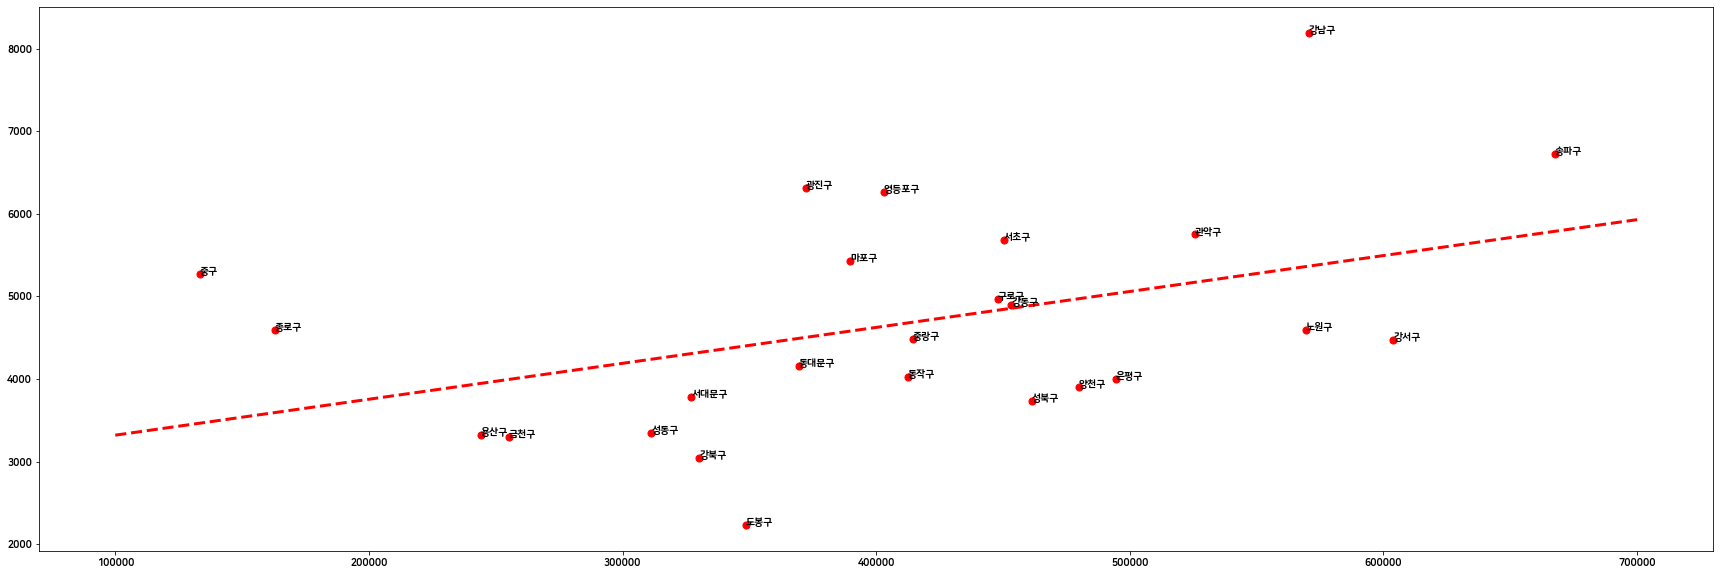

In [135]:
plt.plot(fx, p1(fx), ls='dashed',lw=3, color='r')
plt.scatter(data_result_crime['인구수'], data_result_crime['총 범죄 수'], s=50 , c='r') #'r',  c='#33FFCE'
for i in range(25):
    plt.text(data_result_crime['인구수'][i], data_result_crime['총 범죄 수'][i], data_result_crime.index[i])

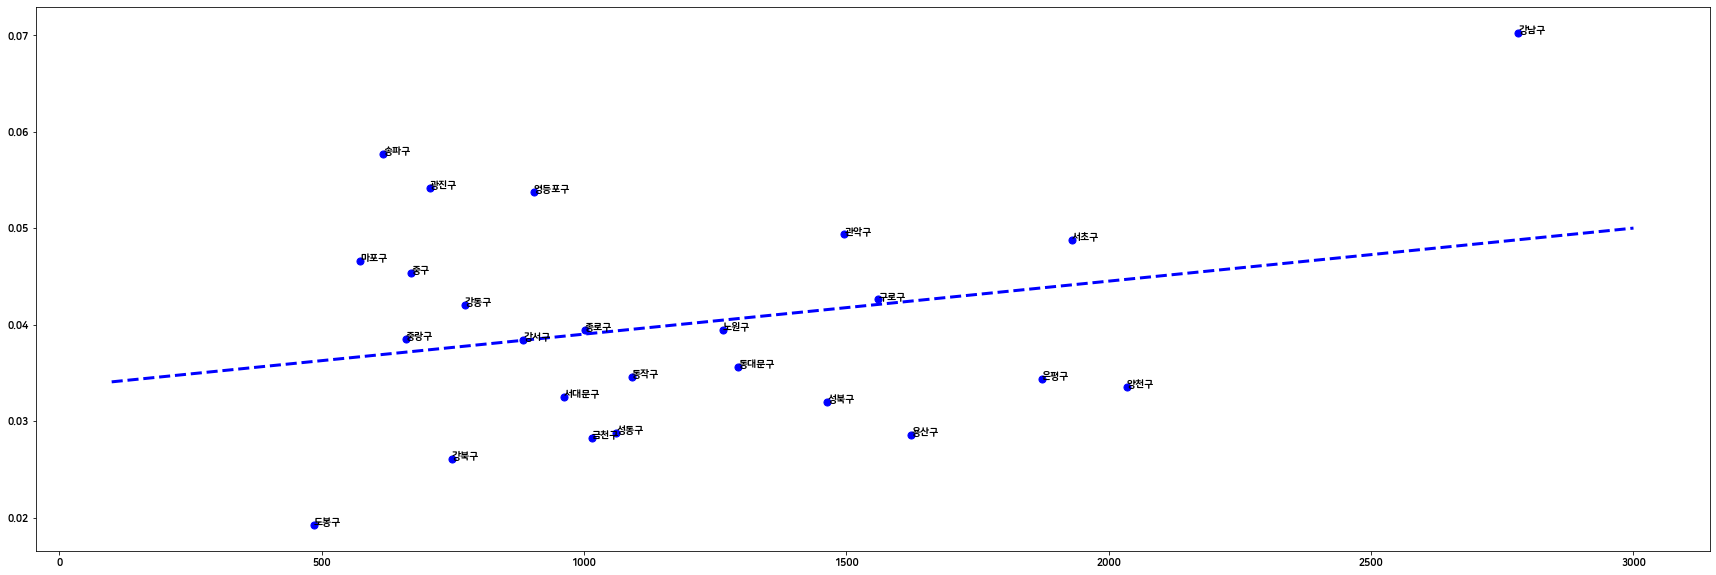

In [143]:
##CCTV와 범죄 발생율은 비슷할까? ==> CCTV가 많은데도 불구하고 범죄발생율이 0.07 ... 상관이 거의 없는것같다. 
f1=np.polyfit(data_result_crime['소계'], data_result_crime['범죄 발생율 합계'], 1)
p1 = np.poly1d(f1)
fx=np.linspace(100,3000,100)
plt.plot(fx, p1(fx), ls='dashed',lw=3, color='b')
plt.scatter(data_result_crime['소계'], data_result_crime['범죄 발생율 합계'], s=50 , c='b') #'r',  c='#33FFCE'
for i in range(25):
    plt.text(data_result_crime['소계'][i], data_result_crime['범죄 발생율 합계'][i], data_result_crime.index[i])

In [148]:
murder = data_result_crime['살인 발생'].sum() / data_result_crime['총 범죄 수'].sum()
burglar = data_result_crime['강도 발생'].sum() / data_result_crime['총 범죄 수'].sum()
rape = data_result_crime['강간 발생'].sum() / data_result_crime['총 범죄 수'].sum()
theif = data_result_crime['절도 발생'].sum() / data_result_crime['총 범죄 수'].sum()
violence = data_result_crime['폭력 발생'].sum() / data_result_crime['총 범죄 수'].sum()

([<matplotlib.patches.Wedge at 0x1f2504f5408>,
 [Text(1.0999909731529616, 0.004456341773361859, '살인'),
  Text(1.099876874967148, 0.01645782222838368, '강도'),
  Text(1.0864274342022806, 0.1722655804641461, '강간'),
  Text(-0.10598141030589595, 1.0948826150184199, '절도'),
  Text(-0.05480670433782728, -1.098633799388871, '폭력')],
 [Text(0.5999950762652516, 0.0024307318763791956, '0%'),
  Text(0.5999328408911715, 0.008976993942754734, '0%'),
  Text(0.5925967822921531, 0.09396304388953423, '4%'),
  Text(-0.05780804198503414, 0.5972086991009563, '44%'),
  Text(-0.029894566002451238, -0.5992547996666568, '52%')])

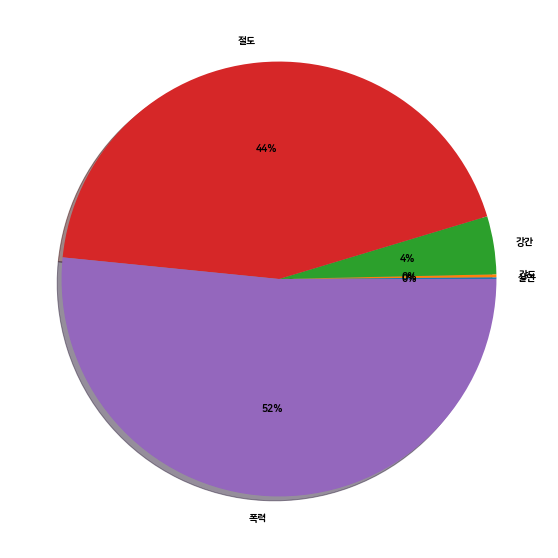

In [150]:
#서울시의 5대 범죄중 가장 많은 비율을 차지하는 범죄는 무엇일까 ===>폭력과 절도가 대부분을 차지, 살인은 굉장히 적게 일어나는 편
x = ['살인', '강도','강간','절도','폭력']
y = [murder, burglar, rape, theif, violence]
plt.pie(y, labels = x, autopct = '%.0f%%', shadow = True)

In [157]:
police_df=pd.read_excel('../csv-data/seoul_police.xls')
police_df.drop(columns=["경찰청","경찰서","지구대파출소치안센터"], inplace=True)
police_df

,구별,합계
0,종로구,25
1,중구,20
2,용산구,13
3,성동구,16
4,광진구,13
5,동대문구,21
6,중랑구,18
7,성북구,26
8,강북구,15
9,도봉구,10


In [158]:
crime_total=pd.merge(data_result_crime, police_df, on='구별')
crime_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 22 columns):
구별           25 non-null object
살인 발생        25 non-null int64
강도 발생        25 non-null int64
강간 발생        25 non-null int64
절도 발생        25 non-null int64
폭력 발생        25 non-null int64
살인 검거율       25 non-null float64
강도 검거율       25 non-null float64
강간 검거율       25 non-null float64
절도 검거율       25 non-null float64
폭력 검거율       25 non-null float64
총 범죄 수       25 non-null int64
소계           25 non-null int64
최근 증가율       25 non-null float64
인구수          25 non-null float64
한국인          25 non-null float64
외국인          25 non-null float64
고령자          25 non-null float64
외국인 비율       25 non-null float64
고령자 비율       25 non-null float64
범죄 발생율 합계    25 non-null float64
합계           25 non-null int64
dtypes: float64(13), int64(8), object(1)
memory usage: 4.5+ KB


In [167]:
crime_total.set_index('구별', inplace=True)


KeyError: "None of ['구별'] are in the columns"

In [168]:
crime_total

,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생,살인 검거율,강도 검거율,강간 검거율,절도 검거율,폭력 검거율,...,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,범죄 발생율 합계,합계
구별,,,,,,,,,,,,,,,,,,,,,
강남구,13,21,449,3850,4284,170.000000,180.000000,158.221477,87.095081,87.095081,...,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.070239,23
강동구,4,6,156,2366,2712,75.000000,133.333333,78.846154,33.347422,33.347422,...,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.042042,17
강북구,7,14,153,1434,2649,114.285714,92.857143,82.352941,43.096234,43.096234,...,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.026111,15
강서구,7,13,262,2096,3207,114.285714,100.000000,72.900763,60.114504,60.114504,...,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.038403,13
관악구,9,12,320,2706,3298,88.888889,116.666667,69.062500,30.561715,30.561715,...,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.049381,20
광진구,4,14,240,3026,2625,100.000000,185.714286,91.666667,42.200925,42.200925,...,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.054162,13
구로구,8,15,281,2335,3007,75.000000,73.333333,58.362989,38.072805,38.072805,...,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.042695,18
금천구,3,6,151,1567,2054,133.333333,100.000000,80.794702,56.668794,56.668794,...,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.028274,13
노원구,10,7,197,2193,2723,100.000000,100.000000,61.421320,36.525308,36.525308,...,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.039484,17


In [162]:
crime_total.corr()

,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생,살인 검거율,강도 검거율,강간 검거율,절도 검거율,폭력 검거율,...,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,범죄 발생율 합계,합계
살인 발생,1.000000,0.674517,0.630405,0.623768,0.768140,-0.100795,-0.000321,-0.152480,-0.068249,-0.068249,...,0.122381,0.198283,0.483755,0.465283,0.204198,0.418230,-0.046058,-0.333755,0.636505,0.285510
강도 발생,0.674517,1.000000,0.617927,0.574428,0.690986,-0.209883,0.117409,-0.097573,-0.040038,-0.040038,...,0.133288,0.157626,0.150353,0.121142,0.436103,0.094879,0.272077,-0.139448,0.589197,0.052428
강간 발생,0.630405,0.617927,1.000000,0.746281,0.670667,0.211761,0.309910,0.088874,0.222939,0.222939,...,0.445849,0.108363,0.376354,0.357080,0.236708,0.238595,0.036447,-0.461394,0.775341,0.305697
절도 발생,0.623768,0.574428,0.746281,1.000000,0.804446,0.027371,0.391653,0.120267,0.141937,0.141937,...,0.251644,0.065735,0.421771,0.405541,0.180018,0.199946,0.038338,-0.593427,0.998989,0.414336
폭력 발생,0.768140,0.690986,0.670667,0.804446,1.000000,-0.043307,0.144007,-0.038326,0.062027,0.062027,...,0.315132,0.090606,0.611615,0.591772,0.202409,0.505161,-0.068483,-0.471083,0.809663,0.310296
살인 검거율,-0.100795,-0.209883,0.211761,0.027371,-0.043307,1.000000,0.462460,0.801382,0.776737,0.776737,...,0.599579,-0.193026,0.078876,0.099748,-0.345914,0.063198,-0.279585,-0.076323,0.038694,0.490905
강도 검거율,-0.000321,0.117409,0.309910,0.391653,0.144007,0.462460,1.000000,0.692331,0.685373,0.685373,...,0.245631,0.131659,-0.103085,-0.091526,-0.164539,-0.166369,-0.026356,-0.039485,0.391396,0.374681
강간 검거율,-0.152480,-0.097573,0.088874,0.120267,-0.038326,0.801382,0.692331,1.000000,0.888151,0.888151,...,0.432935,0.001646,-0.133024,-0.107689,-0.377746,-0.122958,-0.176069,0.155644,0.118932,0.591120
절도 검거율,-0.068249,-0.040038,0.222939,0.141937,0.062027,0.776737,0.685373,0.888151,1.000000,1.000000,...,0.446364,0.034418,-0.078258,-0.060323,-0.270341,-0.076896,-0.074080,0.125278,0.148566,0.548624
폭력 검거율,-0.068249,-0.040038,0.222939,0.141937,0.062027,0.776737,0.685373,0.888151,1.000000,1.000000,...,0.446364,0.034418,-0.078258,-0.060323,-0.270341,-0.076896,-0.074080,0.125278,0.148566,0.548624


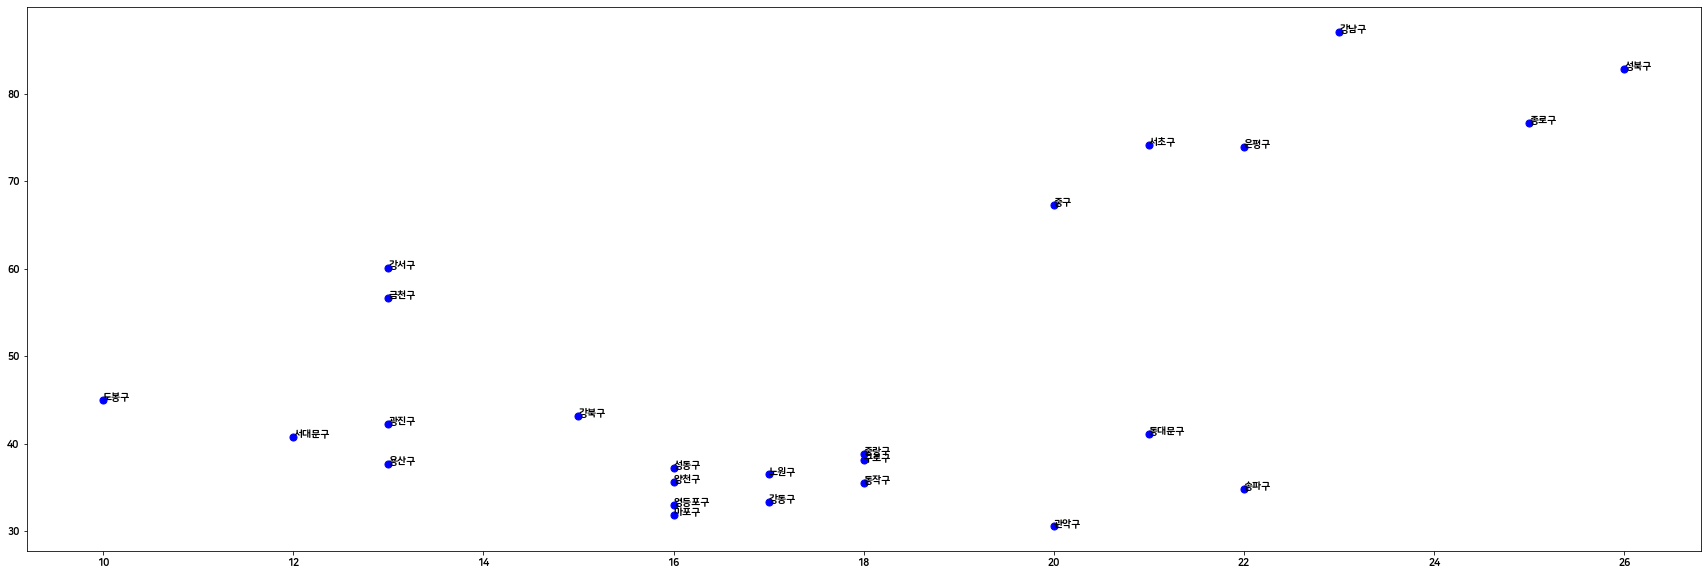

In [165]:
#경찰서 갯수 와 검거율은 관련이 있을까? 
#비슷한 경찰서 수를 가진 은평구와 송파구는 차이가 큰걸보아 관련이 있는것같지 않다. 
f1=np.polyfit(crime_total['합계'], crime_total['절도 검거율'], 1)
p1 = np.poly1d(f1)
fx=np.linspace(100,3000,100)
# plt.plot(fx, p1(fx), ls='dashed',lw=3, color='b')
plt.scatter(crime_total['합계'], crime_total['절도 검거율'], s=50 , c='b') #'r',  c='#33FFCE'
for i in range(25):
    plt.text(crime_total['합계'][i], crime_total['절도 검거율'][i], data_result_crime.index[i])